# Module 9 - Programming Assignment

## Directions

There are general instructions on Blackboard and in the Syllabus for Programming Assignments. This Notebook also has instructions specific to this assignment. Read all the instructions carefully and make sure you understand them. Please ask questions on the discussion boards or email me at `EN605.445@gmail.com` if you do not understand something.

<div style="background: mistyrose; color: firebrick; border: 2px solid darkred; padding: 5px; margin: 10px;">
Please follow the directions and make sure you provide the requested output. Failure to do so may result in a lower grade even if the code is correct or even 0 points.
</div>

You must submit a zip file of your assignment and associated files (if there are any) to Blackboard. The zip file will be named after you JHED ID: `<jhed_id>.zip`. It will not include any other information. Inside this zip file should be the following directory structure:

```
<jhed_id>
    |
    +--module09.ipynb
    +--(any other files)
```

For example, do not name  your directory `programming_assignment_01` and do not name your directory `smith122_pr1` or any else. It must be only your JHED ID.

# Model Evaluation

In Programming Assignment 8, you implemented logistic regression. In this assignment, you're going to use the performance metrics and model evaluation techniques discussed in this module to evaluate the logistic regression.

You will need a few of your functions from that assignment. The cleanest way is to export that notebook to a regular .py file and import the required functions. You will need to submit that file along with your notebook. Another approach is to just copy/paste the relevant code into this notebook. Either approach is acceptable.

For this assignment, the discussion and programming are flipped. By answering the questions, you will be able to figure out what you need to do for this assigment.

## Discussion

**1\. We often want to know how well a model will perform on unseen data, that is, we want to get a sense of the generalization error. What is the name of the technique described in the lectures for accomplishing this. Sketch an algorithm for implementing this technique.**

The technique described in the lectures is known as *cross validation*. The general algorithm for cross validation is as follows:
```
# shuffle the data and split it into 5 folds of equal size
shuffled_data = shuffle(data)
folds[1-5] = split(shuffled_data)

# Run through five iterations of choosing one of the folds as a test
# set and training the model against the other four folds.
# Calculate and save the error rate for each iteration.
for i in 1 to 5:
    test_set = folds[i]
    training_set = folds[not i]
    model = learn_model(training_set)
    results = apply_model(model, test_set)
    error_rate[i] = results['error_rate']

# Calculate the overall error rate average and standard deviation.
error_rate_avg = avg(error_rate)
error_rate_std_dev = std_dev(error_rate)
```

**2\. One of the first things people think of when trying to improve models is to get more data where "more data" is more observations (another view of "more data" is more features). What technique can we use to see if getting more observations will improve the performance of our model? Sketch an algorithm for accomplishing this.**

The technique described in the lectures suggests that we choose a test set and training set the same way as above, but this time, we train on only 5% of the training set and calculate the error-rate on the training set. Then, we apply the model on the test set and calculate the error-rate on it. We then plot the the results with percent of the training-set used on the x-axis and error-rate on the y-axis. We repeat this process, adding 5% more to each iteration until 100% of the training set is utilized. If the curves meet within some reasonable threshold, more data won't help. Otherwise, more data *will* help.

```
# shuffle the data and split it into 5 folds of equal size
shuffled_data = shuffle(data)
folds[1-5] = split(shuffled_data)
percent = 5
training_error_rate[100] = 0
test_error_rate[100] = 0

while percent <= 100:
    for i in 1 to 5:
        test_set = folds[i]
        training_set = get_percent_of(folds[not i], percent)
        model = learn_model(training_set)

        # apply the model to the training set
        training_results = apply_model(model, training_set)

        # apply the model to the test set
        test_results = apply_model(model, test_set)

        training_error_rate[percent] += training_results['error_rate']
        test_error_rate[percent] += test_results['error_rate']
    # divide by # of folds, to get average
    training_error_rate[percent]/=5
    test_error_rate[percent]/=5
    percent += 5

# Plot the training and test errors
plot(training_error_rate, test_error_rate

# Figure out if we need more data
need_more_data = abs(training_error_rate[100] - test_error_rate[100]) > threshold
```

**3\. Many algorithms have "hyper parameters" which control the performance of the algorithm independent of strictly data considerations. For example, a neural network can have 1 or 2 hidden layers and each layer can have N or M nodes. For logistic regression, a default threshold of 0.5 is often used for deciding if the classification should be 0 or 1 but that may not be the best value for our particular problem. What technique can we use to see check the values of our "hyper parameters"? Sketch an algorithm for accomplishing this.**

The example provided in the lecture shows how to choose the best parameter (degree) for a polynomial. We will be doing something similar here, but instead of degree, we will be choosing different values for the threshold. We can plot every value for the threshold in 0.1 increments from 0 to 1 against the error rate. The ideal threshold will be the x-value of the "inflection point" of the test curve.

```
test_set = generated_test_set
training_set = generated_training_set

threshold = 0.0
thresholds = []
least_error_index = 0
least_error_test_curve = MAX_INT
for i = 0 to 8:
    threshold += 0.1
    thresholds.append(threshold)

    model = learn_model(training_set, threshold)

    training_results = apply_model(model, training_set)
    training_error[i] = training_results['error_rate']

    test_results = apply_model(model, test_set)
    test_error[i] = test_results['error_rate']

    if test_results['error_rate'] < least_error_test_curve:
        ideal_threshold = 0.1 + 0.1*i
        least_error_test_curve = test_results['error_rate']

plot(thresholds, training_error, test_error)


```

You are now going to evaluate your logistic regression model from last week on all three dimensions of evaluation and improvment. The questions you want to answer are:

1. how well would the logistic regression perform on new observations.
2. will getting more training data improve performance of our logistic regression.
3. What is the best threshold value for the logistic regression for this problem.

A couple of things to keep in mind:

1. Learning and Validation Curves are *curves*. Just printing data but not doing the **charts** will result in a failing assignment.
2. Plot lines and not points. Yes, you don't have a point for every value but just plot lines anyway.

When in doubt, ask questions the discussion forums. I'm leaving this one a bit open-ended to test your understanding of the module and how learning curves are used to assess models. 

Use matplotlib for your charts; a student posted a link to a nice tutorial http://matplotlib.org/1.3.1/users/pyplot_tutorial.html.

Make sure you describe your rationale and design choices.

**Answer 1.**

We perform cross validation using logistic regression.

Our 200 generated input sets are split up into 5 folds and we select one fold as our 'test set' and the remaining folds make up the 'training set'.

We we calculate the error rate for our training model on the test fold and loop through all of our folds, giving each one a chance to be the 'test set'.

Finally we add together all of our errors and print out the average and standard deviation.

It was my understanding that this problem did not require a chart; the answers are printed.

In [1]:
from module08 import *
import matplotlib.pyplot as plt

def split(data):
    x_test, y_test = zip(*data)
    x_folds = np.split(np.array(list(x_test)), 5)
    y_folds = np.split(np.array(list(y_test)), 5)
    return x_folds, y_folds

def answer1():
    num_to_generate = 200
    threshold = 0.5
    data = generate_data(clean_data, int(num_to_generate / 2), "hills")
    x_folds, y_folds = split(data)
    error_rates = []
    print('Performing logistic regression, please wait...')
    for i in range(0, 5):
        x_test_set = x_folds[i]
        y_test_set = y_folds[i]

        x_training_set = np.delete(x_folds, i, 0).reshape(int(num_to_generate - num_to_generate / 5), 16)
        y_training_set = np.delete(y_folds, i, 0).reshape(int(num_to_generate - num_to_generate / 5), )

        model = learn_model((x_training_set, y_training_set))
        results = apply_model(model, x_test_set, threshold)
        single_error_rate = error_rate(y_test_set, results)
        error_rates.append(single_error_rate)
        print(f'Error rate testing fold {i + 1}: {single_error_rate}')
    print('\nCross Validation Metrics')
    print(f'Average Error Rate: {np.average(error_rates)}')
    print(f'Standard Deviation of Error Rates: {np.std(error_rates)}')
answer1()

Performing logistic regression, please wait...
Error rate testing fold 1: 0.075
Error rate testing fold 2: 0.0
Error rate testing fold 3: 0.0
Error rate testing fold 4: 0.025
Error rate testing fold 5: 0.0

Cross Validation Metrics
Average Error Rate: 0.02
Standard Deviation of Error Rates: 0.0291547594742265


**Answer 2.**

Similarly to the first problem, we perform cross validation in this problem, but our ultimate goal is to determine whether or not we have enough data.

To do this we incrementally add more data to our training set, we train our model, test it against *both* the training-set and the test-set, and record each error.

We start with 20% of the training data and continue to add 20% until we reach 100%.

When I executed this method, at 100% there was a difference in the training and test error rates of 0.02. I defined the "high variance threshold" to be 0.05, therefore, we have enough data.

Performing logistic regression, please wait...
Percent of training set being used: 20
Percent of training set being used: 40
Percent of training set being used: 60
Percent of training set being used: 80
Percent of training set being used: 100
The difference between the training and test error rate at 100% was 0.02 which is under our variance threshold 0.05. We do not need more data!


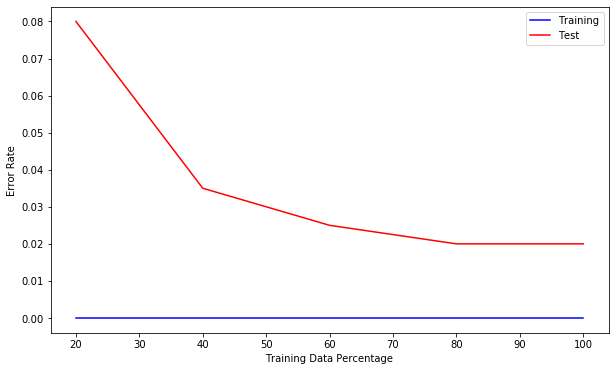

In [2]:
def answer2():
    num_to_generate = 200
    threshold = 0.5
    percent = 20
    folds = 5
    training_size = int(num_to_generate - num_to_generate / folds)
    data = generate_data(clean_data, int(num_to_generate / 2), "hills")
    training_error_rate = {}
    test_error_rate = {}
    x_folds, y_folds = split(data)
    error_rates = []
    print('Performing logistic regression, please wait...')
    while percent <= 100:
        training_error_rate[percent] = 0
        test_error_rate[percent] = 0
        print(f'Percent of training set being used: {percent}')
        for i in range(0, folds):
            x_test_set = x_folds[i]
            y_test_set = y_folds[i]

            x_training_set = np.delete(x_folds, i, 0).reshape(training_size, 16)
            y_training_set = np.delete(y_folds, i, 0).reshape(training_size, )

            # create a subset of training data, based on our percentage
            x_training_set = x_training_set[0:int(training_size * 0.01 * percent)]
            y_training_set = y_training_set[0:int(training_size * 0.01 * percent)]
            model = learn_model((x_training_set, y_training_set))
            # get error rate of training data
            training_results = apply_model(model, x_training_set, threshold)
            training_error_rate[percent] += error_rate(y_training_set, training_results)
            # get error rate of test data
            test_results = apply_model(model, x_test_set, threshold)
            test_error_rate[percent] += error_rate(y_test_set, test_results)
        # we want an average from the results of the 5 folds
        training_error_rate[percent] = training_error_rate[percent] / folds
        test_error_rate[percent] = test_error_rate[percent] / folds
        percent += 20
    plt.figure(figsize=(10, 6))
    plt.plot(list(training_error_rate.keys()), list(training_error_rate.values()), color='b', label='Training')
    plt.plot(list(test_error_rate.keys()), list(test_error_rate.values()), color='r', label='Test')
    plt.xlabel('Training Data Percentage')
    plt.ylabel('Error Rate')
    plt.legend()
    plt.show()

    training_difference = abs(training_error_rate[100] - test_error_rate[100])
    high_variance_threshold = 0.05
    need_more_data = training_difference > high_variance_threshold
    if need_more_data:
        print(
            f'The difference between the training and test error rate at 100% was {training_difference} which is over our variance threshold {high_variance_threshold}. We need more data!')
    else:
        print(
            f'The difference between the training and test error rate at 100% was {training_difference} which is under our variance threshold {high_variance_threshold}. We do not need more data!')

answer2()

**Answer 3.**

For the third and final problem, we are looking at finding the ideal hyper-parameter for logistic regression.

The "deciding threshold" for logistic regression is our hyper-parameter, so for this problem, we set the threshold to 0.1, and apply our model to our test and training data sets. We plot the error rate and increment the threshold by 0.1 and continue this process, until we reach a threshold of 1.

We then determine the ideal threshold by finding the inflection point in the test curve, which was found to be 0.4 when I executed the algorithm.

Performing logistic regression with threshold 0.0...
Performing logistic regression with threshold 0.1...
Performing logistic regression with threshold 0.2...
Performing logistic regression with threshold 0.3...
Performing logistic regression with threshold 0.4...
Performing logistic regression with threshold 0.5...
Performing logistic regression with threshold 0.6...
Performing logistic regression with threshold 0.7...
Performing logistic regression with threshold 0.8...
Performing logistic regression with threshold 0.9...
Performing logistic regression with threshold 1.0...

The inflection point of the test curve is at index 4.
Therefore, the best threshold would be 0.4


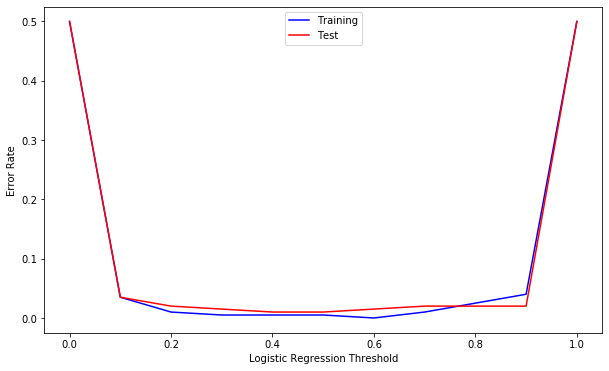

In [3]:
def answer3():
    num_to_generate = 200
    threshold = 0.0
    thresholds = []
    training_error_rate = []
    test_error_rate = []
    data = generate_data(clean_data, int(num_to_generate / 2), "hills")
    x_training_set, y_training_set = zip(*data)
    x_training_set = np.array(x_training_set)
    y_training_set = np.array(y_training_set)
    test_data = generate_data(clean_data, int(num_to_generate / 2), "hills")
    x_test_set, y_test_set = zip(*test_data)
    x_test_set = np.array(x_test_set)
    y_test_set = np.array(y_test_set)

    for i in range(0, 11):
        thresholds.append(threshold)
        print(f'Performing logistic regression with threshold {threshold:.1f}...')
        model = learn_model((x_training_set, y_training_set))
        # get error rate of training data
        training_results = apply_model(model, x_training_set, threshold)
        training_error_rate.append(error_rate(y_training_set, training_results))
        # get error rate of test data
        test_results = apply_model(model, x_test_set, threshold)
        test_error_rate.append(error_rate(y_test_set, test_results))
        threshold += 0.1
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, training_error_rate, color='b', label='Training')
    plt.plot(thresholds, test_error_rate, color='r', label='Test')
    plt.xlabel('Logistic Regression Threshold')
    plt.ylabel('Error Rate')
    plt.legend()
    plt.show()

    # find the "inflection point" which determines our best threshold value
    min_error_index = np.argmin(test_error_rate)
    print(f'\nThe inflection point of the test curve is at index {min_error_index}.')
    print(f'Therefore, the best threshold would be {thresholds[min_error_index]:.1f}')

answer3()